## Deep Learning Assignment - Assignment 3

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import pickle

### Loading Training Data

In [2]:
X = pd.read_pickle("trainX.pickle")

In [3]:
y = pd.read_pickle("trainY.pickle")

In [4]:
X.shape

(60000, 28, 28)

### Visualization 

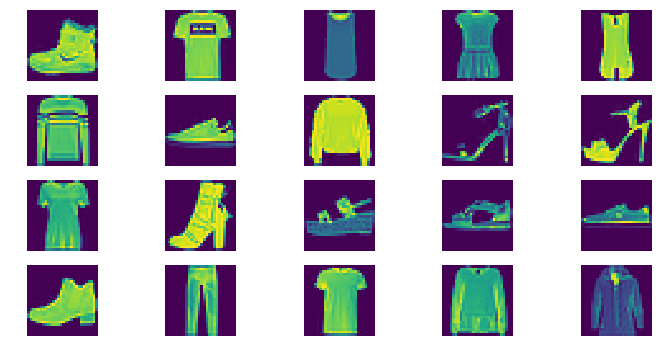

In [10]:
fig = plt.figure(figsize=(12,6))
for num, x in enumerate(X[:20]):
    plt.subplot(4,5,num+1)
    plt.axis('off')
    plt.imshow(x)

### Splitting data into training and testing

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (48000, 28, 28)
48000 train samples
12000 test samples


### Scalling data - Pixel values between 0 and 1-  grayscale normalization

In [40]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshaping input as per Convolution layer needs

In [41]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


### Making 1st CNN Model

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

### Model Summary

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

In [44]:
history = model.fit(x_train, y_train, epochs=50,verbose=1,validation_data=(x_test, y_test),batch_size=256)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.6106 - acc: 0.7854 - val_loss: 0.3613 - val_acc: 0.8677
Epoch 2/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.3829 - acc: 0.8652 - val_loss: 0.3112 - val_acc: 0.8868
Epoch 3/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.3306 - acc: 0.8821 - val_loss: 0.2847 - val_acc: 0.8941
Epoch 4/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.2990 - acc: 0.8921 - val_loss: 0.2638 - val_acc: 0.9060
Epoch 5/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.2711 - acc: 0.9015 - val_loss: 0.2484 - val_acc: 0.9103
Epoch 6/50
48000/48000 [==============================] - 3s 62us/step - loss: 0.2499 - acc: 0.9088 - val_loss: 0.2369 - val_acc: 0.9137
Epoch 7/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.2361 - acc: 0.9148 - val_loss: 0.2568 - val_acc

### Plotting graphs - loss and accuracy

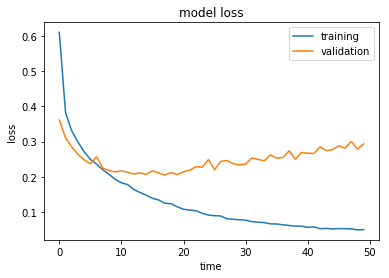

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

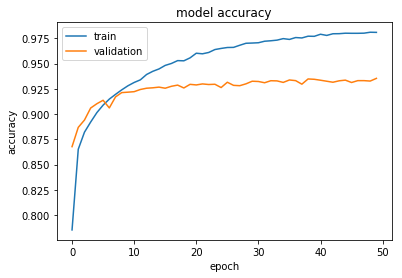

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Confusion Matrix

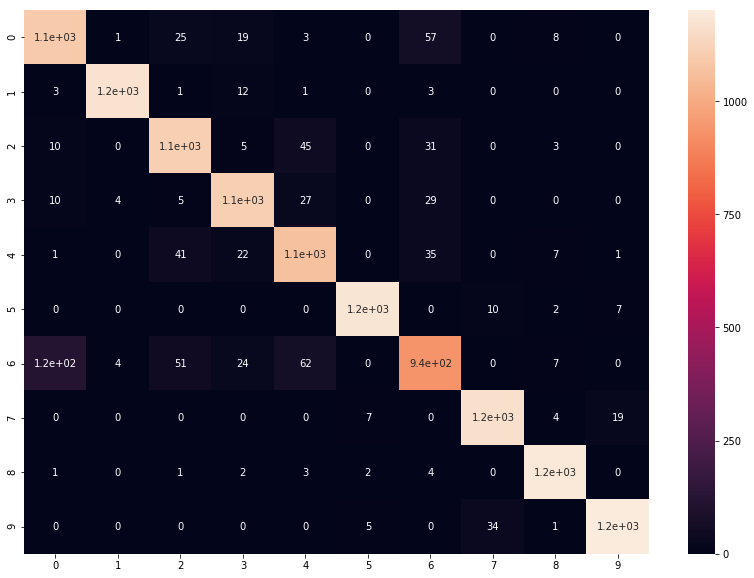

In [49]:
predicted_classes = model.predict_classes(x_test)
cm = confusion_matrix(y_test.argmax(axis = 1), predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

### Classification Report

In [50]:
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test.argmax(axis = 1), predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.91      0.90      1207
     Class 1       0.99      0.98      0.99      1191
     Class 2       0.90      0.92      0.91      1202
     Class 3       0.93      0.94      0.93      1184
     Class 4       0.88      0.91      0.90      1176
     Class 5       0.99      0.98      0.99      1198
     Class 6       0.85      0.78      0.82      1202
     Class 7       0.96      0.97      0.97      1196
     Class 8       0.97      0.99      0.98      1203
     Class 9       0.98      0.97      0.97      1241

   micro avg       0.94      0.94      0.94     12000
   macro avg       0.93      0.94      0.93     12000
weighted avg       0.94      0.94      0.93     12000



### Trying 2nd Model - AlexNet

In [36]:
# def alexnet(in_shape=(227,227,3), n_classes=1000, opt='sgd'):
#     in_layer = layers.Input(in_shape)
#     conv1 = layers.Conv2D(96, 11, strides=1, activation='relu')(in_layer)
#     pool1 = layers.MaxPool2D(3, 2)(conv1)
#     conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
#     pool2 = layers.MaxPool2D(3, 2)(conv2)
#     conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
#     conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
#     pool3 = layers.MaxPool2D(3, 2)(conv4)
#     flattened = layers.Flatten()(pool3)
#     dense1 = layers.Dense(4096, activation='relu')(flattened)
#     drop1 = layers.Dropout(0.5)(dense1)
#     dense2 = layers.Dense(4096, activation='relu')(drop1)
#     drop2 = layers.Dropout(0.5)(dense2)
#     preds = layers.Dense(n_classes, activation='softmax')(drop2)

#     model = Model(in_layer, preds)
#     model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#     return model

In [37]:
# model = alexnet(input_shape,num_classes,opt = keras.optimizers.Adam())
# history = model.fit(x_train, y_train, epochs=50,verbose=1,validation_data=(x_test, y_test),batch_size=256)


Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 10s 224us/step - loss: 0.8822 - acc: 0.6542 - val_loss: 0.5138 - val_acc: 0.8131
Epoch 2/50
45000/45000 [==============================] - 8s 182us/step - loss: 0.4267 - acc: 0.8398 - val_loss: 0.3953 - val_acc: 0.8574
Epoch 3/50
45000/45000 [==============================] - 8s 183us/step - loss: 0.3573 - acc: 0.8702 - val_loss: 0.3405 - val_acc: 0.8751
Epoch 4/50
45000/45000 [==============================] - 8s 183us/step - loss: 0.3114 - acc: 0.8847 - val_loss: 0.3129 - val_acc: 0.8873
Epoch 5/50
45000/45000 [==============================] - 8s 183us/step - loss: 0.2888 - acc: 0.8934 - val_loss: 0.3297 - val_acc: 0.8801
Epoch 6/50
45000/45000 [==============================] - 8s 183us/step - loss: 0.2667 - acc: 0.9020 - val_loss: 0.3058 - val_acc: 0.8829
Epoch 7/50
45000/45000 [==============================] - 8s 187us/step - loss: 0.2489 - acc: 0.9080 - val_loss: 0.3046 -

In [38]:
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Test loss: 0.5790461255421552
Test accuracy: 0.9015333333651224


### Loding Test data

In [51]:
xtest = pd.read_pickle("testX.pickle")

### Scaling and reshaping 

In [54]:
xtest = xtest.astype('float32')
xtest /= 255

xtest = xtest.reshape(xtest.shape[0], img_rows, img_cols, 1)

### Predicting 

In [56]:
pred_classes = model.predict_classes(xtest)

In [57]:
pred_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

### Saving Predictions as pickle file

In [59]:
with open('prediction.pickle','wb') as f: pickle.dump(pred_classes, f)

In [61]:
with open('prediction.pickle','rb') as f: arr = pickle.load(f)

np.array_equal(pred_classes,arr) #sanity check

True